### Overview: Uniqlo stock price prediction

Stock price prediction plays a crucial role in financial analysis and decision-making. This project focuses specifically on predicting stock prices for Uniqluo in the Japanese market. By leveraging historical data and advanced machine learning techniques, I aim to develop accurate models that can forecast future stock prices.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#four>3. Exploratory Data Analysis (EDA)</a>

<a href=#five>4. Data Engineering</a>

<a href=#six>5. Modeling</a>

<a href=#seven>6. Model Evaluation</a>

<a href=#seven>7. Model Explanations</a>

<a href=#seven>8. Conclusion</a>

<a href=#seven>9. References</a>

<a id="one"></a>
# 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we imported and briefly discussed the libraries that will be used throughout the analysis and modelling. |

---

### 1.1. Data analysis Packages
To analyze the the data we will need the following packages
<ul> 
    <li><b>Numpy</b></li>
    Numpy is a packages used to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.<br>
    <li><b>Pandas</b></li>
    Pandas is mainly used for data analysis and associated manipulation of tabular data in Dataframes. Pandas allows importing data from various file formats such as comma-separated values, JSON, Parquet, SQL database tables or queries, and Microsoft Excel.
    <li><b>Matplotlib</b></li>
    Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is a cross-platform library for making 2D plots from data in arrays. It provides an object-oriented API that helps in embedding plots in applications using Python GUI toolkits such as PyQt, WxPythonotTkinter.
    <li><b>Seaborn</b></li>
    Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data.
</ul>

In [586]:
# Libraries for data loading, data manipulation and data visualisation
import pandas as pd      
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from sklearn.preprocessing import StandardScaler
# set plot style
sns.set()

In [111]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [587]:
# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from prophet import Prophet

<a id="two"></a>
# 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we are going to load both the `train` and `test` data into DataFrames. |

---

In [605]:
#loading train data
train = pd.read_csv("C:/Users/emmau/Downloads/stock-price-prediction/stock-price-prediction/data/01_raw/train.csv")
train

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000
...,...,...,...,...,...,...,...
1221,2012-01-11,14360,14750,14280,14590,1043400,15191988000
1222,2012-01-10,13890,14390,13860,14390,952300,13533413000
1223,2012-01-06,13990,14030,13790,13850,765500,10635609000
1224,2012-01-05,13720,13840,13600,13800,511500,7030811000


In [606]:
#loading train data
test = pd.read_csv("C:/Users/emmau/Downloads/stock-price-prediction/stock-price-prediction/data/01_raw/test.csv")
test

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2017-01-13,38900,39380,38240,38430,1321200,51197289000
1,2017-01-12,38300,38450,37930,38010,800900,30540359000
2,2017-01-11,38710,38880,38480,38560,545900,21089798000
3,2017-01-10,38620,38850,38150,38690,1196900,46107703000
4,2017-01-06,40500,41030,39720,39720,1435500,57708934000
5,2017-01-05,43250,43330,42470,42590,516800,22124250000
6,2017-01-04,42480,43330,42450,43290,648100,27916728000


In [607]:
test_df = test.drop('Close', axis=1)
test_df

,Date,Open,High,Low,Volume,Stock Trading
0,2017-01-13,38900,39380,38240,1321200,51197289000
1,2017-01-12,38300,38450,37930,800900,30540359000
2,2017-01-11,38710,38880,38480,545900,21089798000
3,2017-01-10,38620,38850,38150,1196900,46107703000
4,2017-01-06,40500,41030,39720,1435500,57708934000
5,2017-01-05,43250,43330,42470,516800,22124250000
6,2017-01-04,42480,43330,42450,648100,27916728000


<a id="three"></a>
# 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section we are going to perform an in-depth analysis of all the variables in the DataFrame. This would give us proper knowledge of our feature and label to know how useful they are to this project.

---

TypeError: 'locator' must be an instance of matplotlib.ticker.Locator, not a type

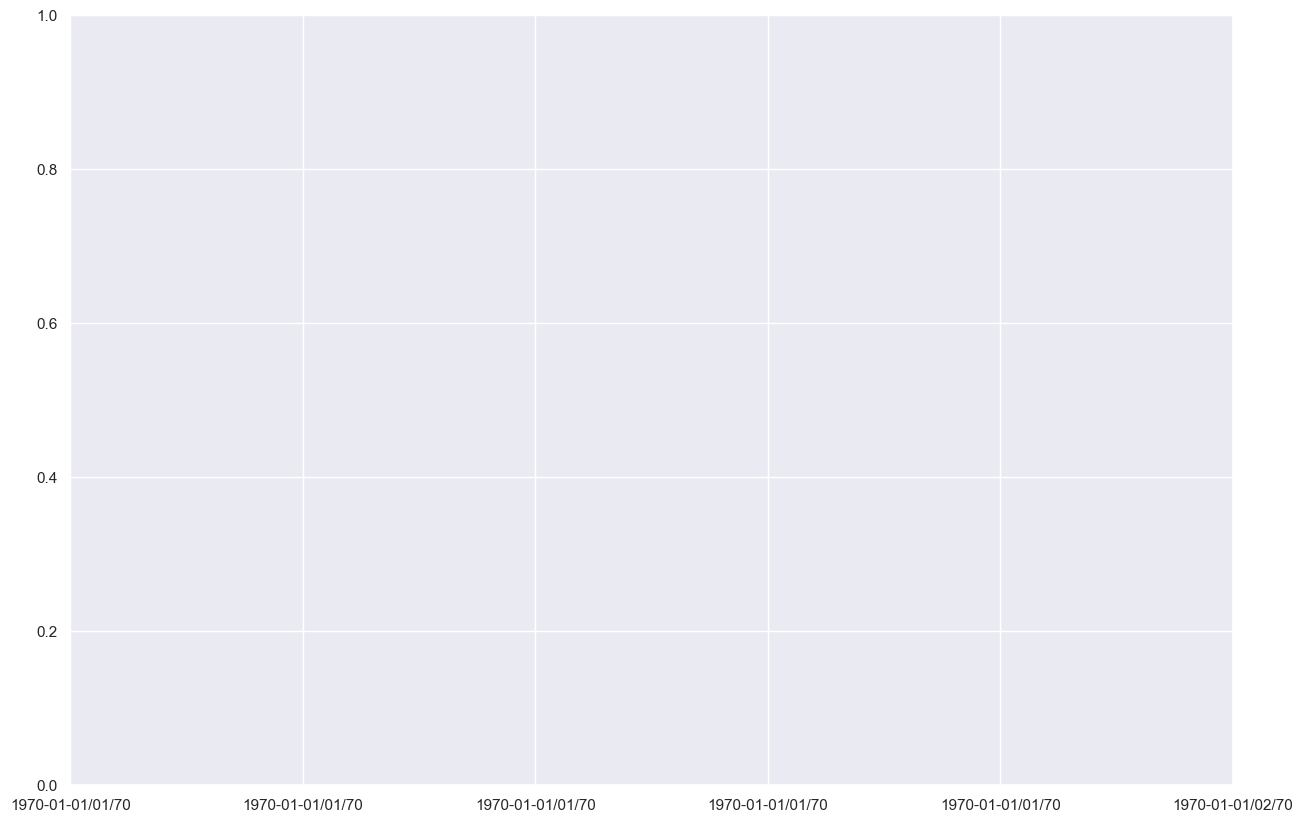

In [498]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%D'))
plt.gca().xaxis.set_major_locator(mdates.DateLocator)
x_dates = [dt.datetime.strptime(d, '%Y-%m-%D').date() for d in stock_data.index.values]

plt.plot(x_dates, train['High'], label = 'High')
plt.plot(x_dates, train['Low'], label = 'Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled Yuan')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [294]:
# look at data statistics
train.describe()

,Open,High,Low,Close,Volume,Stock Trading
count,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03,1.226000e+03
mean,33754.416803,34178.784666,33347.903752,33760.583197,7.275556e+05,2.440933e+10
std,10813.440409,10936.326802,10695.664102,10815.661389,4.137178e+05,1.526300e+10
min,13720.000000,13840.000000,13600.000000,13720.000000,1.391000e+05,3.966140e+09
25%,27788.750000,28091.250000,27401.250000,27675.000000,4.873000e+05,1.454097e+10
50%,34445.000000,34835.000000,33925.000000,34412.500000,6.260000e+05,2.153772e+10
75%,41412.500000,41900.000000,40810.000000,41365.000000,8.267000e+05,3.015922e+10
max,61550.000000,61970.000000,60740.000000,61930.000000,4.937300e+06,1.460450e+11


In [6]:
#checking skewness
train.skew()

C:\Users\emmau\AppData\Local\Temp\ipykernel_16136\544579026.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


Open            -0.072705
High            -0.083753
Low             -0.054521
Close           -0.065266
Volume           3.333327
Stock Trading    2.246844
dtype: float64

In [7]:
#checking the kurtosis to see if there are outliers in our dataset
train.kurtosis()

C:\Users\emmau\AppData\Local\Temp\ipykernel_16136\2936712521.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.kurtosis()


Open             -0.566187
High             -0.560909
Low              -0.561267
Close            -0.554980
Volume           18.725118
Stock Trading     8.478203
dtype: float64

In [8]:
train.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64

C:\Users\emmau\AppData\Local\Temp\ipykernel_16136\1233350892.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)


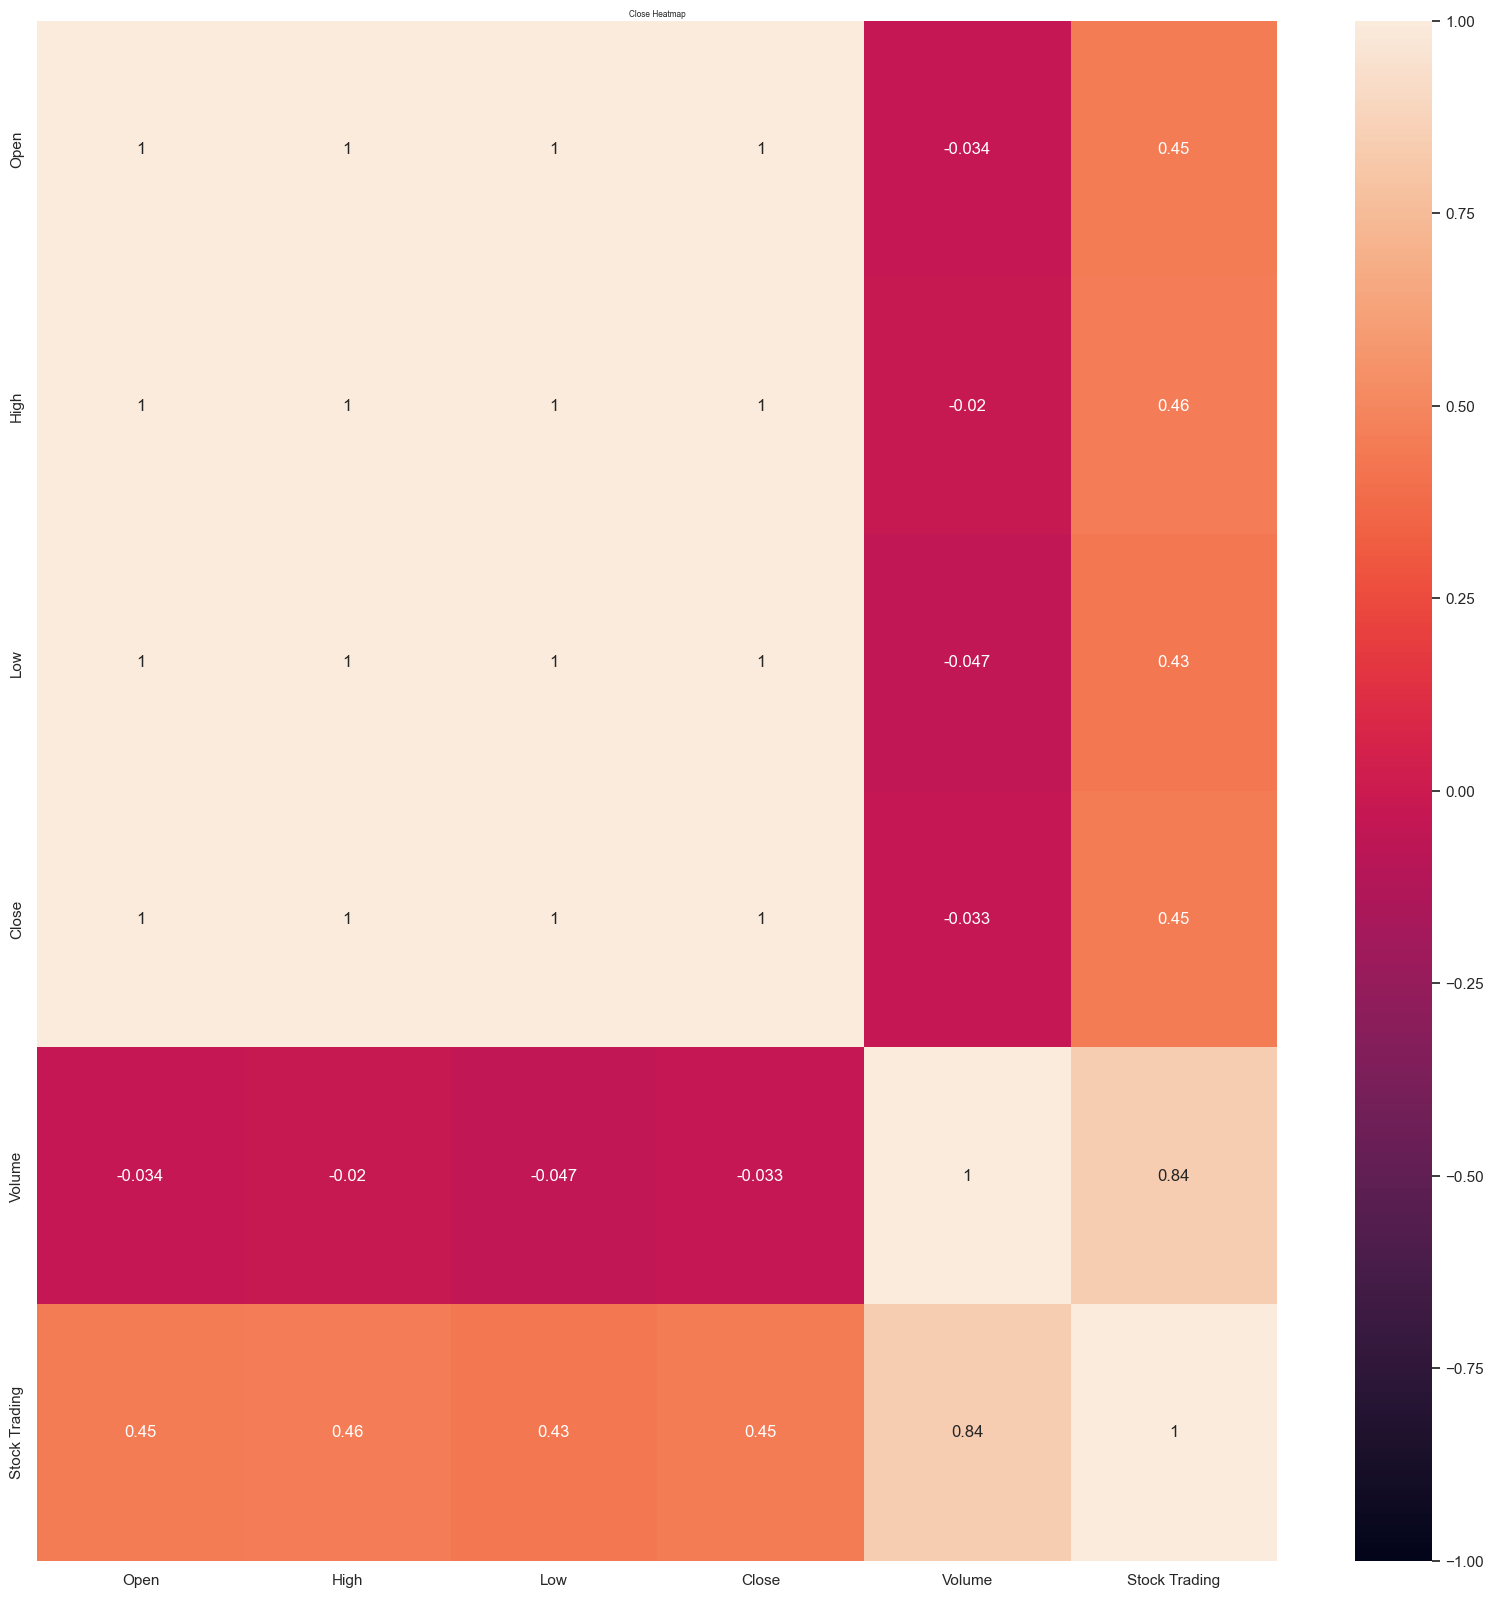

In [9]:
# plot relevant feature interactions
##Checking for Multicollinearity
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Close Heatmap', fontdict={'fontsize':6}, pad=3);

C:\Users\emmau\AppData\Local\Temp\ipykernel_16136\368687591.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(train.corr()[['Close']].sort_values(by='Close', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


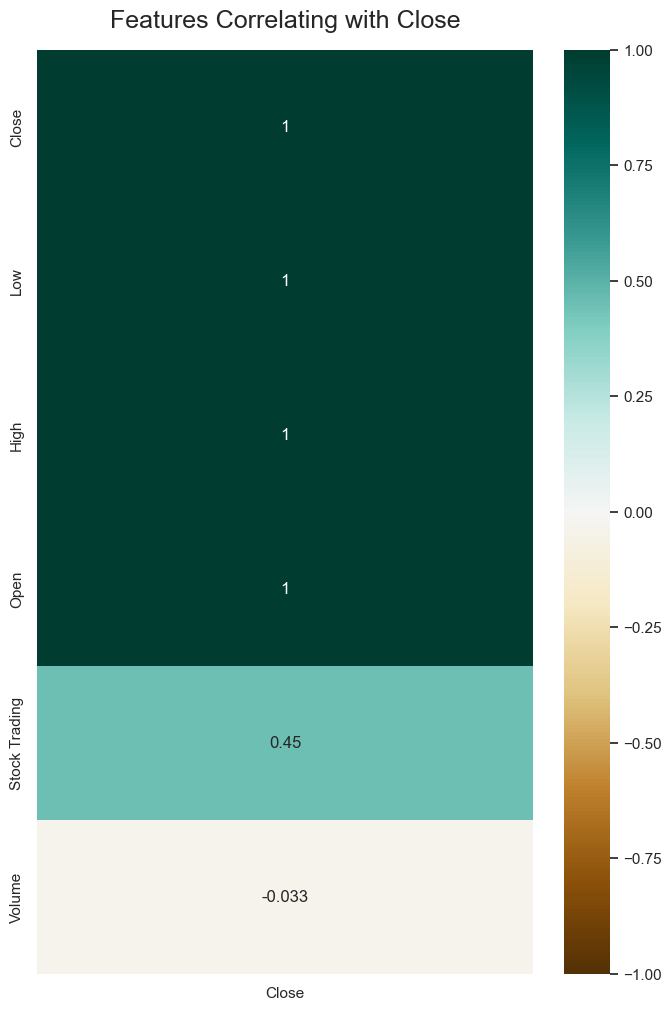

In [10]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['Close']].sort_values(by='Close', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Close', fontdict={'fontsize':18}, pad=16);

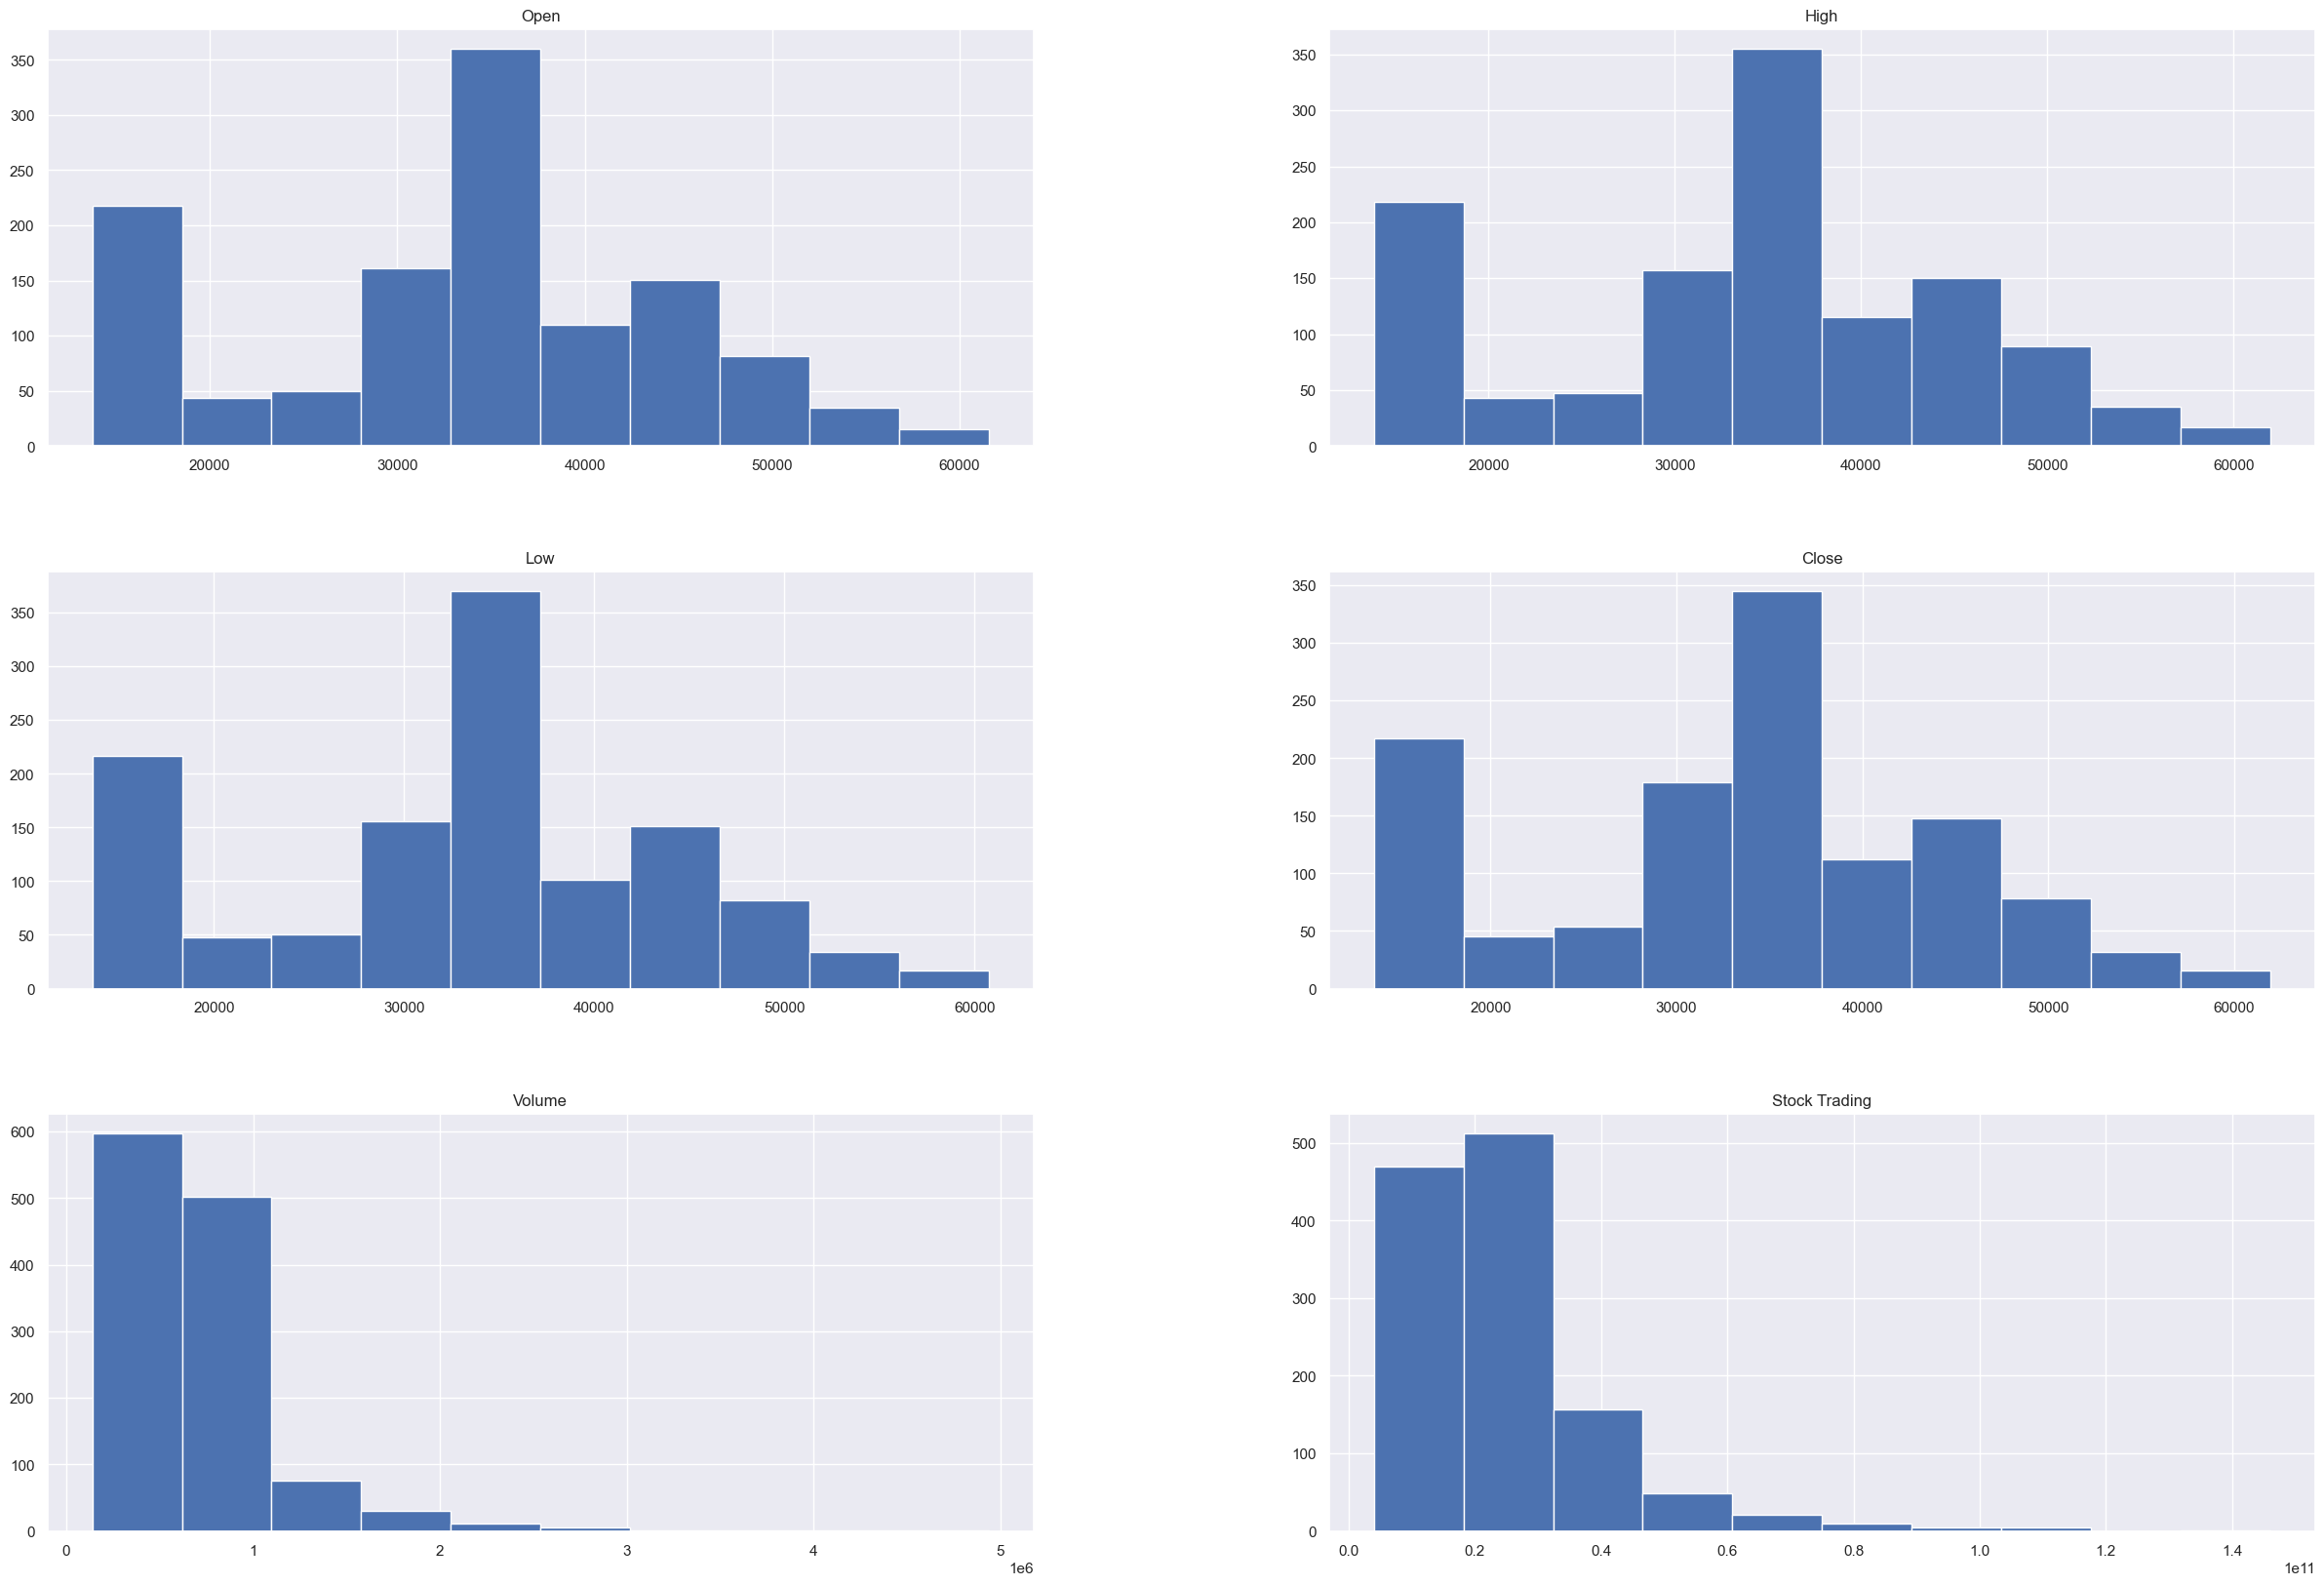

In [11]:
train.hist(figsize=(30,20));

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>
---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we are going to: clean the dataset, and possibly create new features - as identified in the EDA phase. This is the phase where we drop the features we identified to drop in the EDA phase|
---

In [591]:
y = train['Close']

In [608]:
def feature_engineering(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.insert(3,'Month',train.Date.dt.month)
    df.insert(2,'Year',train.Date.dt.year)
    df.insert(4,'Day',train.Date.dt.day)
    #df['quarter'] = df['Date'].dt.quarter
    # Calculate the difference between "high" and "low" columns
    #df["price_spread"] = df["High"] - df["Low"]
    drop_df = df.drop(['Date','Close', 'Volume', 'Stock Trading'], axis=1)
    # initialize the StandardScaler object
    #scaler = StandardScaler()
    # fit and transform the data using the scaler
    #scaled_data = scaler.fit_transform(drop_df)
    return drop_df

In [609]:
X = feature_engineering(train)
X

,Open,Year,High,Day,Month,Low
0,42120,2016,42330,30,12,41700
1,43000,2016,43220,29,12,42540
2,43940,2016,43970,28,12,43270
3,43140,2016,43700,27,12,43140
4,43310,2016,43660,26,12,43090
...,...,...,...,...,...,...
1221,14360,2012,14750,11,1,14280
1222,13890,2012,14390,10,1,13860
1223,13990,2012,14030,6,1,13790
1224,13720,2012,13840,5,1,13600


In [382]:
#plt.figure(figsize=(8, 12))
#heatmap = sns.heatmap(X.corr()[['Close']].sort_values(by='Close', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
#heatmap.set_title('Features Correlating with Close', fontdict={'fontsize':18}, pad=16);

In [610]:
test_y = test['Close']
test_y

0    38430
1    38010
2    38560
3    38690
4    39720
5    42590
6    43290
Name: Close, dtype: int64

In [611]:
new_data = feature_engineering(test)
new_data

,Open,Year,High,Day,Month,Low
0,38900,2016,39380,30,12,38240
1,38300,2016,38450,29,12,37930
2,38710,2016,38880,28,12,38480
3,38620,2016,38850,27,12,38150
4,40500,2016,41030,26,12,39720
5,43250,2016,43330,22,12,42470
6,42480,2016,43330,21,12,42450


<a id="five"></a>
# 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a> 

---

    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we created classification models that are able to accurately predict the sentiments |

---

In [612]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, 
random_state = 42, test_size = 0.20)

In [613]:
def train_model(model, X_train, y_train):
    """
    Trains a machine learning model on input training data.
    
    Parameters:
        model (object): A machine learning model object with a `fit` method.
        X_train (array-like): Input training data for the model.
        y_train (array-like): Output training data for the model.
        
    Returns:
        object: A trained machine learning model object.
    """
    # Fit the model on the input training data
    model.fit(X_train, y_train)
    
    # Return the trained model
    return model

In [614]:
#initializing the model the algorithms
lr = LinearRegression()
regressor = RandomForestRegressor()
xgbr = xgb.XGBRegressor(verbosity=0)
model = LGBMRegressor()

In [615]:
#training linear regression model
lr_model = train_model(lr, x_train, y_train)
lr_model

LinearRegression()

In [616]:
#training randomforest model
rf = train_model(regressor, x_train, y_train)
rf

RandomForestRegressor()

In [631]:
#training XGBOOST model
# Defining the parameter grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200],
}
grid_search_xgb = GridSearchCV(xgbr, param_grid=param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
xgbm = train_model(grid_search_xgb, x_train, y_train)
xgbm

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [632]:
models = [("xgb", xgbm), ("lreg", lr_model)]
# Specify weights for weighted model averaging
model_weightings = np.array([0.7, 0.3])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

In [633]:
#training randomforest model
ensemble = train_model(v_reg, x_train, y_train)
ensemble

VotingRegressor(estimators=[('xgb',
                             GridSearchCV(cv=5,
                                          estimator=XGBRegressor(base_score=None,
                                                                 booster=None,
                                                                 callbacks=None,
                                                                 colsample_bylevel=None,
                                                                 colsample_bynode=None,
                                                                 colsample_bytree=None,
                                                                 early_stopping_rounds=None,
                                                                 enable_categorical=False,
                                                                 eval_metric=None,
                                                                 feature_types=None,
                                                                 gamma=None,
                                                                 gpu_id=None,
                                                                 grow_policy=None,
                                                                 importance_type=None,
                                                                 interaction_co...
                                                                 max_leaves=None,
                                                                 min_child_weight=None,
                                                                 missing=nan,
                                                                 monotone_constraints=None,
                                                                 n_estimators=100,
                                                                 n_jobs=None,
                                                                 num_parallel_tree=None,
                                                                 predictor=None,
                                                                 random_state=None, ...),
                                          param_grid={'learning_rate': [0.001,
                                                                        0.01,
                                                                        0.1,
                                                                        0.2,
                                                                        0.3],
                                                      'max_depth': [3, 5, 7],
                                                      'n_estimators': [50, 100,
                                                                       200]},
                                          scoring='neg_mean_squared_error')),
                            ('lreg', LinearRegression())],
                weights=array([0.7, 0.3]))

In [142]:
#params = {
   # 'objective': 'regression',  # 'binary' for binary classification, 'regression' for regression
   # 'metric': 'rmse',  # 'binary_logloss' for binary classification, 'rmse' for regression
   # 'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
   # 'num_leaves': 31,  # Maximum number of leaves in one tree
  #  'learning_rate': 0.05,  # Learning rate for boosting
   # 'feature_fraction': 0.9,  # Proportion of features to consider in each iteration
   # 'bagging_fraction': 0.8,  # Proportion of data to bag in each iteration
   # 'bagging_freq': 5,  # Frequency for bagging
   # 'verbose': 0  # Set to 1 for debugging information, 0 for no outputs
#}


In [182]:
#num_boost_round = 100  # Number of boosting rounds (iterations)
#model = lgbm.train(params, train_data, num_boost_round=num_boost_round)

In [634]:
def predict(model, X_test, data, target, result_title, new_data=None):
    """
    Uses a trained machine learning model to make predictions on new data.
    
    Parameters:
        model (object): A trained machine learning model object with a `predict` method.
        X_test (array-like): Input data to make predictions on.
        
    Returns:
        array-like: An array of predicted values for each input in `X_test`.
    """
    # Use the model to make predictions on the input data
    y_pred = model.predict(X_test)
     # If new unseen data is provided, make predictions on it as well
    if new_data is not None:
        model.fit(data, target)
        y_pred_unseen = model.predict(new_data)
        #result of the prediction
        result_model = pd.DataFrame(y_pred_unseen, columns= ['Close'])
        # merge the one-hot encoded data frame with the original data frame
        test_result = pd.concat([test_df, result_model], axis=1)
        #final_result = test_result[['customer_id', 'subscribed']]
        test_result.to_csv(result_title, index = False)    #this helps to output and store the final prediction to csv
        print(test_result)
        return y_pred
    
    # Return the predictions
    return y_pred, test_result

In [625]:
#logistic regression prediction
lr_predict = predict(lr_model, x_test, X, y, 
                       "lr_pred.csv", new_data=new_data)

         Date   Open   High    Low   Volume  Stock Trading         Close
0  2017-01-13  38900  39380  38240  1321200    51197289000  38733.885965
1  2017-01-12  38300  38450  37930   800900    30540359000  38116.813979
2  2017-01-11  38710  38880  38480   545900    21089798000  38665.982575
3  2017-01-10  38620  38850  38150  1196900    46107703000  38413.492867
4  2017-01-06  40500  41030  39720  1435500    57708934000  40267.842795
5  2017-01-05  43250  43330  42470   516800    22124250000  42647.312241
6  2017-01-04  42480  43330  42450   648100    27916728000  43168.345994


In [568]:
test_y

0    38430
1    38010
2    38560
3    38690
4    39720
5    42590
6    43290
Name: Close, dtype: int64

In [620]:
#randomforest prediction
rf_predict = predict(rf, x_test, X, y, 
                       "rf_pred.csv", new_data=new_data)

         Date   Open   High    Low   Volume  Stock Trading     Close
0  2017-01-13  38900  39380  38240  1321200    51197289000  38964.45
1  2017-01-12  38300  38450  37930   800900    30540359000  37986.60
2  2017-01-11  38710  38880  38480   545900    21089798000  38715.55
3  2017-01-10  38620  38850  38150  1196900    46107703000  38627.95
4  2017-01-06  40500  41030  39720  1435500    57708934000  40402.10
5  2017-01-05  43250  43330  42470   516800    22124250000  42669.30
6  2017-01-04  42480  43330  42450   648100    27916728000  42799.80


In [635]:
#logistic regression prediction
xgb_predict = predict(xgbm, x_test, X, y, 
                       "xgb_pred.csv", new_data=new_data)

         Date   Open   High    Low   Volume  Stock Trading         Close
0  2017-01-13  38900  39380  38240  1321200    51197289000  38469.394531
1  2017-01-12  38300  38450  37930   800900    30540359000  38141.265625
2  2017-01-11  38710  38880  38480   545900    21089798000  38456.226562
3  2017-01-10  38620  38850  38150  1196900    46107703000  38651.152344
4  2017-01-06  40500  41030  39720  1435500    57708934000  40477.578125
5  2017-01-05  43250  43330  42470   516800    22124250000  42651.496094
6  2017-01-04  42480  43330  42450   648100    27916728000  43165.937500


In [150]:
test_y

0    38430
1    38010
2    38560
3    38690
4    39720
5    42590
6    43290
Name: Close, dtype: int64

In [636]:
#logistic regression prediction
vr_predict = predict(ensemble, x_test, X, y, 
                       "ensemble.csv", new_data=new_data)

         Date   Open   High    Low   Volume  Stock Trading         Close
0  2017-01-13  38900  39380  38240  1321200    51197289000  38548.741961
1  2017-01-12  38300  38450  37930   800900    30540359000  38133.930131
2  2017-01-11  38710  38880  38480   545900    21089798000  38519.153366
3  2017-01-10  38620  38850  38150  1196900    46107703000  38579.854501
4  2017-01-06  40500  41030  39720  1435500    57708934000  40414.657526
5  2017-01-05  43250  43330  42470   516800    22124250000  42650.240938
6  2017-01-04  42480  43330  42450   648100    27916728000  43166.660048


In [228]:
test_y

0    38430
1    38010
2    38560
3    38690
4    39720
5    42590
6    43290
Name: Close, dtype: int64

<a id="six"></a>
# 6. Model Evaluation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a> 

---

    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we check the performance of each of these models |

---

In [627]:
def evaluate(model, X_test, y_test):
    """
    Evaluates the performance of a machine learning model on input test data.
    
    Parameters:
        model (object): A trained machine learning model object with a `predict` method.
        X_test (array-like): Input data to make predictions on.
        y_test (array-like): True output values for the input test data.
        
    Returns:
        float: The evaluation score for the model's predictions.
    """
    # Use the model to make predictions on the input test data
    y_pred = model.predict(X_test)
    
    # Evaluate the predictions using an appropriate metric (e.g., accuracy, MSE, etc.)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    # Return the evaluation score
    return rmse, r2

In [628]:
#logistic regression evaluation
lr_eval = evaluate(lr_model, x_test, y_test)
lr_eval

(244.2976367559362, 0.9994879889671341)

In [574]:
#logistic regression evaluation
rf_eval = evaluate(rf, x_test, y_test)
rf_eval

(140.18331219296164, 0.9998314093745219)

In [629]:
#logistic regression evaluation
xg_eval = evaluate(xgbm, x_test, y_test)
xg_eval

(9.552325716523482, 0.9999992171851907)

In [443]:
#logistic regression evaluation
lg_eval = evaluate(lgm, x_test, y_test)
lg_eval

(283.0253890889028, 0.9993127866621682)

In [630]:
#logistic regression evaluation
vr_eval = evaluate(ensemble, x_test, y_test)
vr_eval

(76.12863848138545, 0.9999502793367594)